<a href="https://colab.research.google.com/github/anishantony8/Deep-Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [3]:
cifar10 = keras.datasets.cifar10

In [4]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [5]:
train_images.shape

(50000, 32, 32, 3)

In [6]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

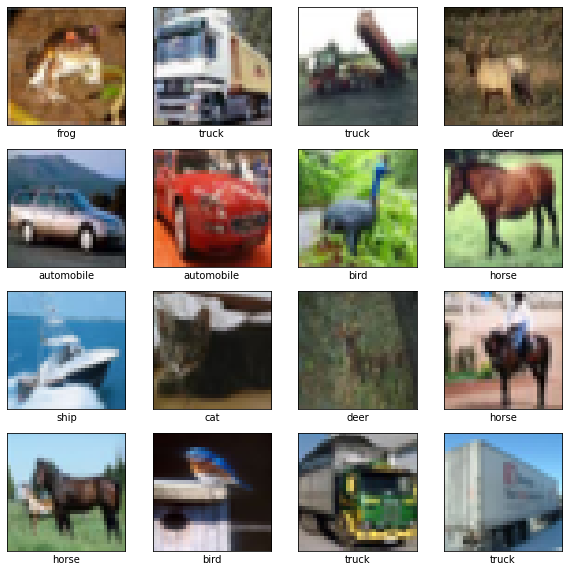

In [10]:
def show():
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

show()

In [11]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),strides=(1,1), padding="valid", activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(32,3,activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)                7

In [13]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

In [14]:
model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [16]:
batch_size = 64
epochs = 5

In [17]:
model.fit(train_images, train_labels, epochs=epochs,
          batch_size=batch_size, verbose=2)

Epoch 1/5
782/782 - 56s - loss: 1.5838 - accuracy: 0.4305 - 56s/epoch - 72ms/step
Epoch 2/5
782/782 - 52s - loss: 1.2475 - accuracy: 0.5616 - 52s/epoch - 66ms/step
Epoch 3/5
782/782 - 53s - loss: 1.1134 - accuracy: 0.6113 - 53s/epoch - 68ms/step
Epoch 4/5
782/782 - 52s - loss: 1.0388 - accuracy: 0.6402 - 52s/epoch - 66ms/step
Epoch 5/5
782/782 - 52s - loss: 0.9821 - accuracy: 0.6601 - 52s/epoch - 66ms/step


In [18]:
model.evaluate(test_images,  test_labels, batch_size=batch_size, verbose=2)

157/157 - 4s - loss: 0.9887 - accuracy: 0.6643 - 4s/epoch - 25ms/step


[0.9886928796768188, 0.6643000245094299]